In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import sem
from sklearn.model_selection import train_test_split
import statsmodels.api as sm


In [164]:
file_path_lib = "../Data Source/library_df.csv"

# Read the mouse data and the study results
library_data = pd.read_csv(file_path_lib)
library_data.head()

,State,Library ID,Submission Year,Library Name,Street Address,City,Zip Code,Longitude,Latitude,State Code,...,County Population,Print_Collection_Expenditures,Digital_Collection_Expenditures,Total Collection Expenditures,Total Operating Expenditures,Print Collection,Digital Collection,Audio Collection,Library Visits,Registered Users
0,AK,AK0001,2015,ANCHOR POINT PUBLIC LIBRARY,72551 MILO FRITZ AVENUE,ANCHOR POINT,99556,-151.840007,59.779604,2,...,57477,3021.0,0.0,4030.0,21282.0,16843.0,0.0,258.0,5379.0,396.0
1,AK,AK0002,2015,ANCHORAGE PUBLIC LIBRARY,3600 DENALI STREET,ANCHORAGE,99503,-149.876781,61.187677,2,...,301010,700747.0,198422.0,1152280.0,10910542.0,481861.0,9773.0,28552.0,942873.0,119619.0
2,AK,AK0003,2015,ANDERSON VILLAGE LIBRARY,101 FIRST STREET,ANDERSON,99744,-149.178635,64.343598,2,...,1921,2206.0,425.0,3508.0,11449.0,15304.0,0.0,48.0,874.0,161.0
3,AK,AK0006,2015,KUSKOKWIM CONSORTIUM LIBRARY,420 CHIEF EDDIE HOFFMAN HIGHWAY,BETHEL,99559,-161.802957,60.785755,2,...,17868,8295.0,1635.0,14801.0,261212.0,34115.0,165.0,434.0,44980.0,1500.0
4,AK,AK0007,2015,BIG LAKE PUBLIC LIBRARY,3140 SOUTH BIG LAKE ROAD,BIG LAKE,99652,-149.818403,61.546612,2,...,97882,21552.0,0.0,21552.0,347675.0,23810.0,9773.0,1813.0,43285.0,3878.0


In [165]:
file_path_census = "../Census Data/census15.csv"

# Read the mouse data and the study results
census_data = pd.read_csv(file_path_census)
census_data.head()

,Name,median_household_income,total_population,median_age,per_capita,education_none,education_high_school,education_ged,education_associates,education_bachelors,...,zipcode,year,education_none_perc,education_high_school_perc,education_ged_perc,education_associates_perc,education_bachelors_perc,education_masters_perc,education_professional_perc,education_doctorate_perc
0,ZCTA5 12810,724.0,57500.0,46.5,25551.0,17.0,169.0,66.0,48.0,28.0,...,12810,2015,0.029565,0.293913,0.114783,0.083478,0.048696,0.033043,0.000000,0.000000
1,ZCTA5 12812,58.0,49583.0,64.1,23600.0,0.0,20.0,0.0,1.0,10.0,...,12812,2015,0.000000,0.040336,0.000000,0.002017,0.020168,0.004034,0.000000,0.000000
2,ZCTA5 12814,1282.0,58176.0,46.4,35508.0,0.0,269.0,15.0,66.0,305.0,...,12814,2015,0.000000,0.462390,0.025784,0.113449,0.524271,0.173611,0.010314,0.010314
3,ZCTA5 12815,1103.0,60458.0,54.2,30685.0,8.0,215.0,44.0,110.0,116.0,...,12815,2015,0.013232,0.355619,0.072778,0.181944,0.191869,0.172020,0.014886,0.000000
4,ZCTA5 12816,4417.0,50417.0,46.9,26988.0,20.0,946.0,145.0,300.0,524.0,...,12816,2015,0.039669,1.876351,0.287601,0.595037,1.039332,0.755697,0.138842,0.087272


In [166]:
#merge data
df=pd.merge(library_data, census_data, left_on="Zip Code", right_on="zipcode",how= "left")
df

,State,Library ID,Submission Year,Library Name,Street Address,City,Zip Code,Longitude,Latitude,State Code,...,zipcode,year,education_none_perc,education_high_school_perc,education_ged_perc,education_associates_perc,education_bachelors_perc,education_masters_perc,education_professional_perc,education_doctorate_perc
0,AK,AK0001,2015,ANCHOR POINT PUBLIC LIBRARY,72551 MILO FRITZ AVENUE,ANCHOR POINT,99556,-151.840007,59.779604,2,...,99556.0,2015.0,0.065051,1.210417,0.250912,0.325256,0.511117,0.153335,0.037172,0.011616
1,AK,AK0002,2015,ANCHORAGE PUBLIC LIBRARY,3600 DENALI STREET,ANCHORAGE,99503,-149.876781,61.187677,2,...,99503.0,2015.0,0.472031,5.205152,1.183280,1.371238,2.588693,1.059399,0.395139,0.049125
2,AK,AK0003,2015,ANDERSON VILLAGE LIBRARY,101 FIRST STREET,ANDERSON,99744,-149.178635,64.343598,2,...,99744.0,2015.0,0.000000,0.022803,0.011401,0.019382,0.026223,0.017102,0.000000,0.000000
3,AK,AK0006,2015,KUSKOKWIM CONSORTIUM LIBRARY,420 CHIEF EDDIE HOFFMAN HIGHWAY,BETHEL,99559,-161.802957,60.785755,2,...,99559.0,2015.0,0.033158,1.977038,0.451776,0.248684,0.772302,0.285987,0.095329,0.058026
4,AK,AK0007,2015,BIG LAKE PUBLIC LIBRARY,3140 SOUTH BIG LAKE ROAD,BIG LAKE,99652,-149.818403,61.546612,2,...,99652.0,2015.0,0.007282,1.117082,0.221377,0.273809,0.471884,0.122340,0.045149,0.007282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9236,WY,WY0019,2015,SUBLETTE COUNTY LIBRARY,155 S TYLER ST,PINEDALE,82941,-109.861281,42.865097,56,...,82941.0,2015.0,0.000000,1.114130,0.103034,0.429121,0.617074,0.235507,0.030571,0.000000
9237,WY,WY0020,2015,TETON COUNTY LIBRARY,125 VIRGINIAN LANE,JACKSON,83001,-110.779203,43.471780,56,...,83001.0,2015.0,0.049372,3.006325,0.517734,0.641830,5.941928,1.885458,0.360279,0.230845
9238,WY,WY0021,2015,UINTA COUNTY LIBRARY,701 MAIN ST,EVANSTON,82930,-110.963405,41.265975,56,...,82930.0,2015.0,0.035921,4.862555,0.949068,1.266684,2.384013,0.661701,0.260899,0.060498
9239,WY,WY0022,2015,WASHAKIE COUNTY LIBRARY,1019 COBURN AVE,WORLAND,82401,-107.955461,44.015771,56,...,82401.0,2015.0,0.087723,2.882326,0.474122,1.063119,1.591545,0.530515,0.139939,0.000000


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9241 entries, 0 to 9240
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   State                            9241 non-null   object 
 1   Library ID                       9241 non-null   object 
 2   Submission Year                  9241 non-null   int64  
 3   Library Name                     9241 non-null   object 
 4   Street Address                   9241 non-null   object 
 5   City                             9241 non-null   object 
 6   Zip Code                         9241 non-null   int64  
 7   Longitude                        9241 non-null   float64
 8   Latitude                         9241 non-null   float64
 9   State Code                       9241 non-null   int64  
 10  County Code                      9241 non-null   int64  
 11  County                           9241 non-null   object 
 12  County Population   

In [168]:
mask=pd.isnull(df.total_population)
df.loc[mask]

,State,Library ID,Submission Year,Library Name,Street Address,City,Zip Code,Longitude,Latitude,State Code,...,zipcode,year,education_none_perc,education_high_school_perc,education_ged_perc,education_associates_perc,education_bachelors_perc,education_masters_perc,education_professional_perc,education_doctorate_perc
14,AK,AK0021,2015,EAGLE PUBLIC LIBRARY,4TH & AMUNDSEN,EAGLE,99738,-141.201518,64.786619,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,AK,AK0031,2015,HOLLIS PUBLIC LIBRARY,NO. 1 HOLLIS CHILKAT ROAD,HOLLIS,99950,-133.075907,55.781881,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,AK,AK0033,2015,HOPE COMMUNITY LIBRARY,18487 A AVENUE,HOPE,99605,-149.445094,60.109417,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,AK,AK0117,2015,HYDER PUBLIC LIBRARY,50 MAIN STREET,HYDER,99923,-130.054261,55.951233,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,AK,AK0120,2015,INNOKO RIVER COMMUNITY/SCHOOL AND TRIBAL LIBRARY,101 PINE STREET,SHAGELUK,99665,-159.837595,62.682486,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8664,VT,VT0197,2015,HARTFORD,1587 MAPLE ST.,HARTFORD,5047,-72.322650,43.653187,50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8665,VT,VT0198,2015,QUECHEE,1957 QUECHEE MAIN ST.,QUECHEE,5059,-72.421296,43.648139,50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8668,VT,VT0208,2015,LYDIA TAFT PRATT,156 WEST ST.,WEST DUMMERSTON,5357,-72.613838,42.927354,50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8669,VT,VT0209,2015,BELCHER MEMORIAL,4452 VT RTE. 107,GAYSVILLE,5746,-72.699770,43.778169,50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [169]:
df2= df.dropna(how="any")
df2

,State,Library ID,Submission Year,Library Name,Street Address,City,Zip Code,Longitude,Latitude,State Code,...,zipcode,year,education_none_perc,education_high_school_perc,education_ged_perc,education_associates_perc,education_bachelors_perc,education_masters_perc,education_professional_perc,education_doctorate_perc
0,AK,AK0001,2015,ANCHOR POINT PUBLIC LIBRARY,72551 MILO FRITZ AVENUE,ANCHOR POINT,99556,-151.840007,59.779604,2,...,99556.0,2015.0,0.065051,1.210417,0.250912,0.325256,0.511117,0.153335,0.037172,0.011616
1,AK,AK0002,2015,ANCHORAGE PUBLIC LIBRARY,3600 DENALI STREET,ANCHORAGE,99503,-149.876781,61.187677,2,...,99503.0,2015.0,0.472031,5.205152,1.183280,1.371238,2.588693,1.059399,0.395139,0.049125
2,AK,AK0003,2015,ANDERSON VILLAGE LIBRARY,101 FIRST STREET,ANDERSON,99744,-149.178635,64.343598,2,...,99744.0,2015.0,0.000000,0.022803,0.011401,0.019382,0.026223,0.017102,0.000000,0.000000
3,AK,AK0006,2015,KUSKOKWIM CONSORTIUM LIBRARY,420 CHIEF EDDIE HOFFMAN HIGHWAY,BETHEL,99559,-161.802957,60.785755,2,...,99559.0,2015.0,0.033158,1.977038,0.451776,0.248684,0.772302,0.285987,0.095329,0.058026
4,AK,AK0007,2015,BIG LAKE PUBLIC LIBRARY,3140 SOUTH BIG LAKE ROAD,BIG LAKE,99652,-149.818403,61.546612,2,...,99652.0,2015.0,0.007282,1.117082,0.221377,0.273809,0.471884,0.122340,0.045149,0.007282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9236,WY,WY0019,2015,SUBLETTE COUNTY LIBRARY,155 S TYLER ST,PINEDALE,82941,-109.861281,42.865097,56,...,82941.0,2015.0,0.000000,1.114130,0.103034,0.429121,0.617074,0.235507,0.030571,0.000000
9237,WY,WY0020,2015,TETON COUNTY LIBRARY,125 VIRGINIAN LANE,JACKSON,83001,-110.779203,43.471780,56,...,83001.0,2015.0,0.049372,3.006325,0.517734,0.641830,5.941928,1.885458,0.360279,0.230845
9238,WY,WY0021,2015,UINTA COUNTY LIBRARY,701 MAIN ST,EVANSTON,82930,-110.963405,41.265975,56,...,82930.0,2015.0,0.035921,4.862555,0.949068,1.266684,2.384013,0.661701,0.260899,0.060498
9239,WY,WY0022,2015,WASHAKIE COUNTY LIBRARY,1019 COBURN AVE,WORLAND,82401,-107.955461,44.015771,56,...,82401.0,2015.0,0.087723,2.882326,0.474122,1.063119,1.591545,0.530515,0.139939,0.000000


In [170]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9171 entries, 0 to 9240
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   State                            9171 non-null   object 
 1   Library ID                       9171 non-null   object 
 2   Submission Year                  9171 non-null   int64  
 3   Library Name                     9171 non-null   object 
 4   Street Address                   9171 non-null   object 
 5   City                             9171 non-null   object 
 6   Zip Code                         9171 non-null   int64  
 7   Longitude                        9171 non-null   float64
 8   Latitude                         9171 non-null   float64
 9   State Code                       9171 non-null   int64  
 10  County Code                      9171 non-null   int64  
 11  County                           9171 non-null   object 
 12  County Population   

In [171]:
#save merged data to csv
df2.to_csv("official.csv", encoding="utf-8", index=False)

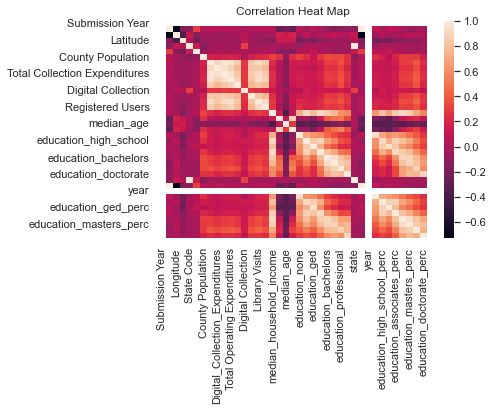

In [172]:
corrs =df2.corr()
corrs

#show heatmap of correlation table above
sns.heatmap(corrs)
plt.title("Correlation Heat Map")
plt.show()

In [173]:
df2.describe()

,Submission Year,Zip Code,Longitude,Latitude,State Code,County Code,County Population,Print_Collection_Expenditures,Digital_Collection_Expenditures,Total Collection Expenditures,...,zipcode,year,education_none_perc,education_high_school_perc,education_ged_perc,education_associates_perc,education_bachelors_perc,education_masters_perc,education_professional_perc,education_doctorate_perc
count,9171.0,9171.000000,9171.000000,9171.000000,9171.000000,9171.000000,9.171000e+03,9.171000e+03,9.171000e+03,9.171000e+03,...,9171.000000,9171.0,9171.000000,9171.000000,9171.000000,9171.000000,9171.000000,9171.000000,9171.000000,9171.000000
mean,2015.0,44655.251663,-87.406308,39.788313,29.980591,80.405190,3.355800e+05,8.047747e+04,2.922712e+04,1.366578e+05,...,44655.251663,2015.0,0.209317,4.259535,0.758208,1.304667,2.498876,1.077539,0.240354,0.172124
std,0.0,28166.891757,16.847304,6.258766,14.237779,85.361436,9.003430e+05,3.404477e+05,1.670209e+05,5.992489e+05,...,28166.891757,0.0,0.445522,4.908113,1.024588,1.486645,3.067068,1.405046,0.381791,0.369608
min,2015.0,1001.000000,-170.280072,0.000000,1.000000,1.000000,2.620000e+02,-3.000000e+00,-3.000000e+00,-3.000000e+00,...,1001.000000,2015.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.0,14896.000000,-95.949465,37.877516,19.000000,21.000000,2.219050e+04,6.052500e+03,0.000000e+00,7.923000e+03,...,14896.000000,2015.0,0.010386,0.910904,0.107916,0.276574,0.412971,0.148232,0.018824,0.009878
50%,2015.0,49328.000000,-87.604854,41.089952,31.000000,59.000000,6.337900e+04,1.742900e+04,1.473000e+03,2.399200e+04,...,49328.000000,2015.0,0.059201,2.379487,0.344383,0.707585,1.189120,0.500637,0.084415,0.051197
75%,2015.0,66711.000000,-75.972506,42.868565,41.000000,113.000000,2.657290e+05,5.381750e+04,9.958500e+03,8.040800e+04,...,66711.000000,2015.0,0.213611,5.739097,0.999389,1.831249,3.470824,1.479661,0.300478,0.188745
max,2015.0,99929.000000,0.000000,71.298460,56.000000,840.000000,1.011670e+07,1.718262e+07,7.390207e+06,2.761352e+07,...,99929.000000,2015.0,6.841421,60.500293,8.714854,13.717390,23.740241,14.783314,4.853758,9.438945


In [174]:
# Pull the median income, registered users, zip code, population
df3 = df2[["median_household_income","Registered Users", "Zip Code", "total_population"]]
df3

,median_household_income,Registered Users,Zip Code,total_population
0,2497.0,396.0,99556,43043.0
1,14107.0,119619.0,99503,46819.0
2,160.0,161.0,99744,87708.0
3,7869.0,1500.0,99559,72381.0
4,4059.0,3878.0,99652,68661.0
...,...,...,...,...
9236,4724.0,6073.0,82941,88320.0
9237,16625.0,32446.0,83001,74942.0
9238,14442.0,16279.0,82930,52894.0
9239,7797.0,6774.0,82401,47878.0


In [175]:
df3 = df3.rename(columns={"Zip Code":"Zip_Code"})
df3 = df3.rename(columns={"Registered Users":"Registered_Users"})
df3

,median_household_income,Registered_Users,Zip_Code,total_population
0,2497.0,396.0,99556,43043.0
1,14107.0,119619.0,99503,46819.0
2,160.0,161.0,99744,87708.0
3,7869.0,1500.0,99559,72381.0
4,4059.0,3878.0,99652,68661.0
...,...,...,...,...
9236,4724.0,6073.0,82941,88320.0
9237,16625.0,32446.0,83001,74942.0
9238,14442.0,16279.0,82930,52894.0
9239,7797.0,6774.0,82401,47878.0


In [176]:
unique_list = list(df3['Zip_Code'].unique())
print(len(unique_list))



8902


In [177]:
pop_sum= df3["total_population"]
pop_sum



income_sum = df3["median_household_income"]
income_sum


reg_sum = df3["Registered_Users"]
reg_sum


zip_code_totals = pd.DataFrame({"median_household_income": income_sum,
                                    "Registered_Users":reg_sum,
                                    "total_population":pop_sum,
                                   "zip_code" : df3.Zip_Code})
zip_code_totals

,median_household_income,Registered_Users,total_population,zip_code
0,2497.0,396.0,43043.0,99556
1,14107.0,119619.0,46819.0,99503
2,160.0,161.0,87708.0,99744
3,7869.0,1500.0,72381.0,99559
4,4059.0,3878.0,68661.0,99652
...,...,...,...,...
9236,4724.0,6073.0,88320.0,82941
9237,16625.0,32446.0,74942.0,83001
9238,14442.0,16279.0,52894.0,82930
9239,7797.0,6774.0,47878.0,82401


In [178]:
reg_user_per_pop = (reg_sum / pop_sum )
reg_user_per_pop

0       0.009200
1       2.554924
2       0.001836
3       0.020724
4       0.056480
          ...   
9236    0.068761
9237    0.432948
9238    0.307766
9239    0.141485
9240    0.089119
Length: 9171, dtype: float64

In [179]:
zip_code_totals = pd.DataFrame({"median_household_income": income_sum,
                                    "Registered_Users":reg_sum,
                                    "total_population":pop_sum,
                                    "zip_code" : df3.Zip_Code,
                                   "Percentage_Registered_Population": reg_user_per_pop})
zip_code_totals


,median_household_income,Registered_Users,total_population,zip_code,Percentage_Registered_Population
0,2497.0,396.0,43043.0,99556,0.009200
1,14107.0,119619.0,46819.0,99503,2.554924
2,160.0,161.0,87708.0,99744,0.001836
3,7869.0,1500.0,72381.0,99559,0.020724
4,4059.0,3878.0,68661.0,99652,0.056480
...,...,...,...,...,...
9236,4724.0,6073.0,88320.0,82941,0.068761
9237,16625.0,32446.0,74942.0,83001,0.432948
9238,14442.0,16279.0,52894.0,82930,0.307766
9239,7797.0,6774.0,47878.0,82401,0.141485


In [180]:
zip_code_totals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9171 entries, 0 to 9240
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   median_household_income           9171 non-null   float64
 1   Registered_Users                  9171 non-null   float64
 2   total_population                  9171 non-null   float64
 3   zip_code                          9171 non-null   int64  
 4   Percentage_Registered_Population  9171 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 429.9 KB


In [181]:
zip_code_totals.describe()

,median_household_income,Registered_Users,total_population,zip_code,Percentage_Registered_Population
count,9171.000000,9.171000e+03,9171.000000,9171.000000,9171.000000
mean,12153.131174,1.842770e+04,55084.685530,44655.251663,0.406863
std,13538.989387,7.384823e+04,21766.016486,28166.891757,1.669135
min,24.000000,-3.000000e+00,8936.000000,1001.000000,-0.000077
25%,2372.500000,1.200000e+03,41493.000000,14896.000000,0.023254
50%,6611.000000,3.890000e+03,50172.000000,49328.000000,0.072077
75%,17690.500000,1.220800e+04,62517.500000,66711.000000,0.226680
max,85700.000000,2.949870e+06,217171.000000,99929.000000,50.279875


In [182]:
zip_code_totals1 = pd.DataFrame({"median_household_income": income_sum,
                                    "Registered_Users":reg_sum,
                                    "total_population":pop_sum,
                                   "Percentage_Registered_Population": reg_user_per_pop})
zip_code_totals1['Percentage_Registered_Population'] = zip_code_totals1['Percentage_Registered_Population'].map("{:,.2f}%".format)
zip_code_totals1.reset_index()


,index,median_household_income,Registered_Users,total_population,Percentage_Registered_Population
0,0,2497.0,396.0,43043.0,0.01%
1,1,14107.0,119619.0,46819.0,2.55%
2,2,160.0,161.0,87708.0,0.00%
3,3,7869.0,1500.0,72381.0,0.02%
4,4,4059.0,3878.0,68661.0,0.06%
...,...,...,...,...,...
9166,9236,4724.0,6073.0,88320.0,0.07%
9167,9237,16625.0,32446.0,74942.0,0.43%
9168,9238,14442.0,16279.0,52894.0,0.31%
9169,9239,7797.0,6774.0,47878.0,0.14%


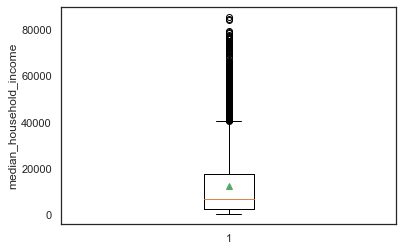

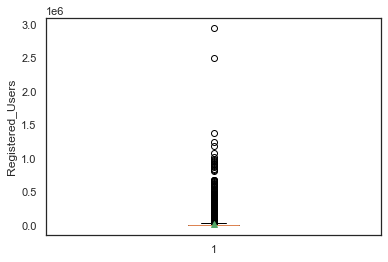

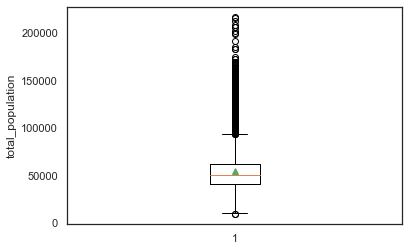

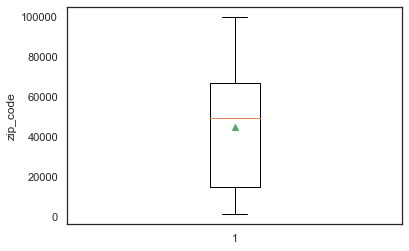

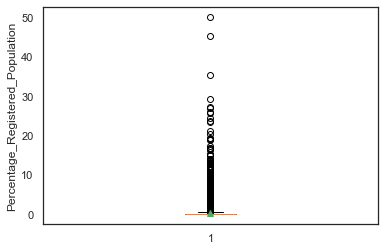

In [183]:
for col in zip_code_totals.columns:
    plt.boxplot(zip_code_totals[col], showmeans=True)
    plt.ylabel(col)
    plt.show()


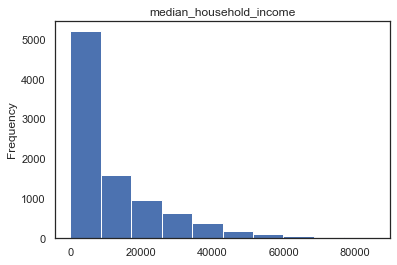

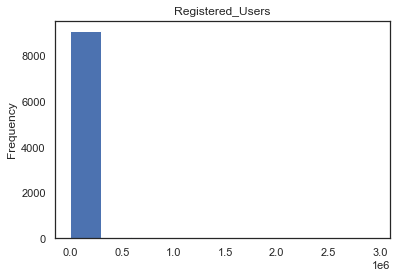

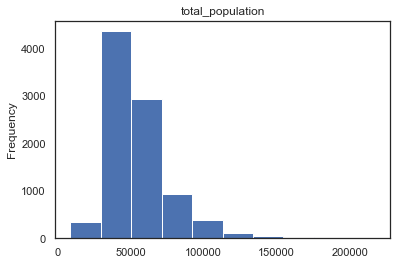

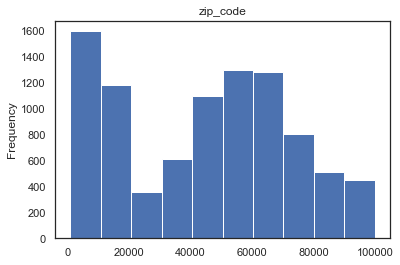

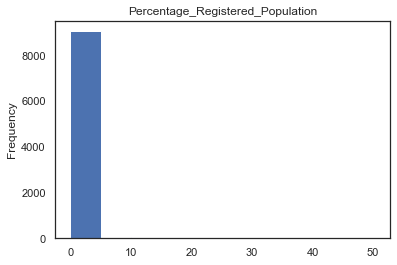

In [184]:
for col in zip_code_totals.columns:
    zip_code_totals[col].plot(kind="hist", title=col)
    plt.show()

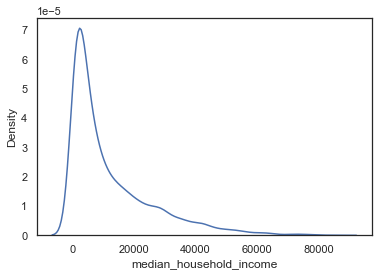

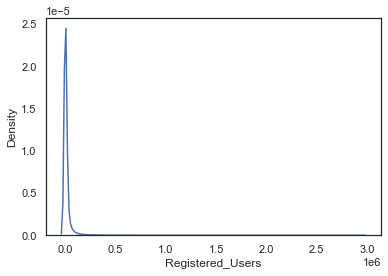

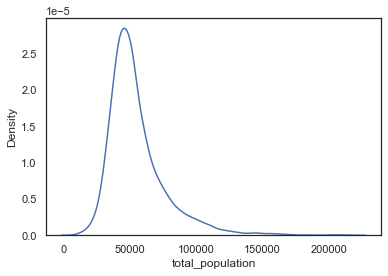

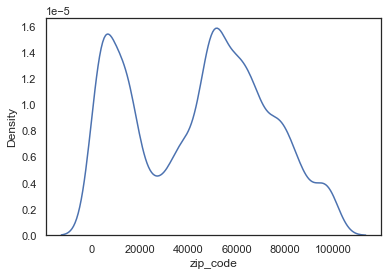

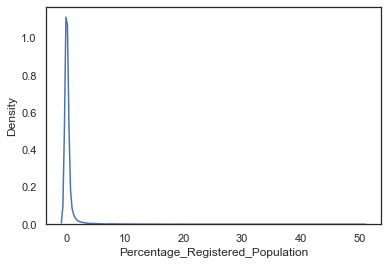

In [185]:
for col in zip_code_totals.columns:
    sns.kdeplot(data=zip_code_totals, x=col)
    plt.show()

In [186]:
median_out = zip_code_totals['median_household_income']

# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = median_out.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of median_out is: {lowerq}")
print(f"The upper quartile of median_out is: {upperq}")
print(f"The interquartile range of median_out is: {iqr}")
print(f"The the median of median_out is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of median_out is: 2372.5
The upper quartile of median_out is: 17690.5
The interquartile range of median_out is: 15318.0
The the median of median_out is: 6611.0 
Values below -20604.5 could be outliers.
Values above 40667.5 could be outliers.


In [187]:
registered_out = zip_code_totals['Percentage_Registered_Population']

# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = registered_out.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of registered_out is: {lowerq}")
print(f"The upper quartile of registered_out is: {upperq}")
print(f"The interquartile range of registered_out is: {iqr}")
print(f"The the median of registered_out is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of registered_out is: 0.023254491628693547
The upper quartile of registered_out is: 0.2266802959708441
The interquartile range of registered_out is: 0.20342580434215055
The the median of registered_out is: 0.07207724165460805 
Values below -0.2818842148845323 could be outliers.
Values above 0.5318190024840699 could be outliers.


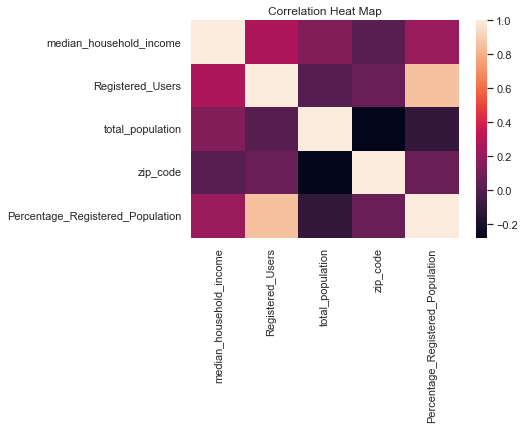

In [188]:
corrs =zip_code_totals.corr()
corrs

#show heatmap of correlation table above
sns.heatmap(corrs)
plt.title("Correlation Heat Map")
plt.show()

In [189]:
flavanoids = zip_code_totals['Percentage_Registered_Population']
malic_acid = zip_code_totals['median_household_income']

In [190]:
print(f"The correlation coefficient between median_household_income and Percentage_Registered_Population is {round(st.pearsonr(malic_acid,flavanoids)[0],2)}")

The correlation coefficient between median_household_income and Percentage_Registered_Population is 0.21


C:\Users\malac\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


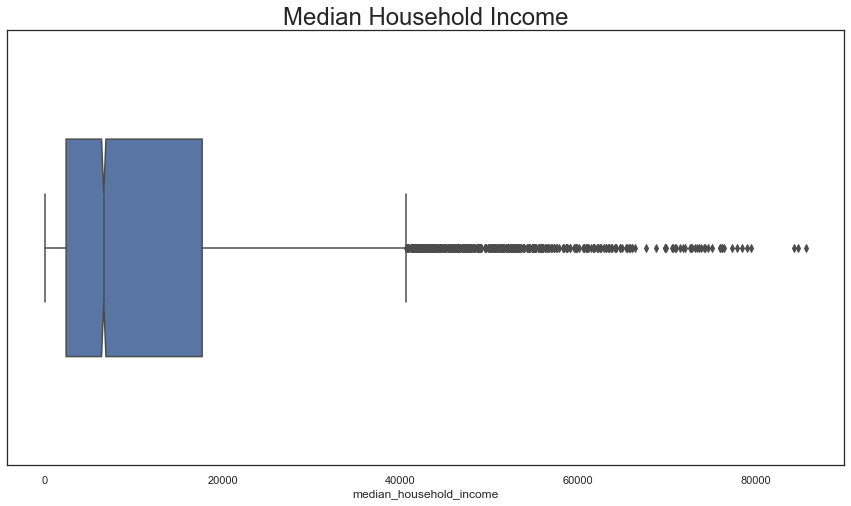

In [191]:

sns.set(style="white")
fig, ax = plt.subplots(figsize=(10,2))
sns.boxplot(zip_code_totals["median_household_income"], width=.5, notch=True)
plt.title("Median Household Income", size=24)
plt.gcf().set_size_inches(15, 8)
plt.show()

C:\Users\malac\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


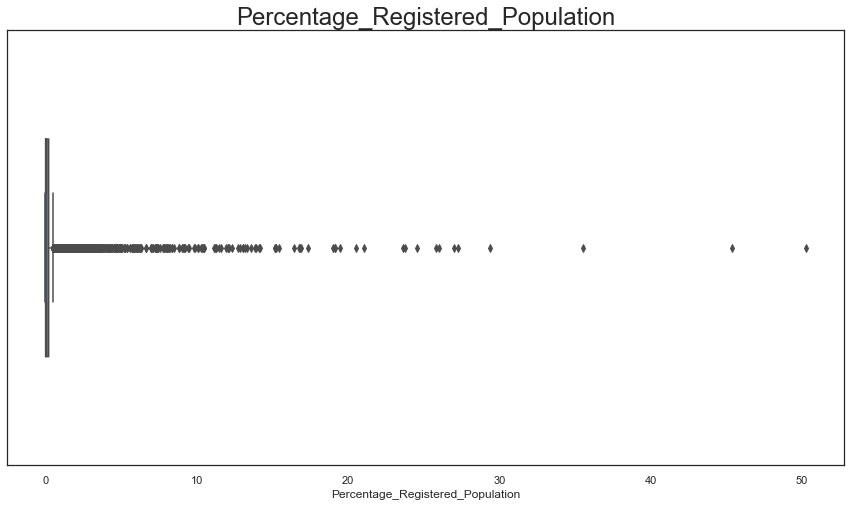

In [192]:

sns.set(style="white")
fig, ax = plt.subplots(figsize=(10,2))
sns.boxplot(zip_code_totals["Percentage_Registered_Population"], width=.5, notch=True)
plt.gcf().set_size_inches(15, 8)
plt.title("Percentage_Registered_Population", size=24)

plt.show()

C:\Users\malac\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


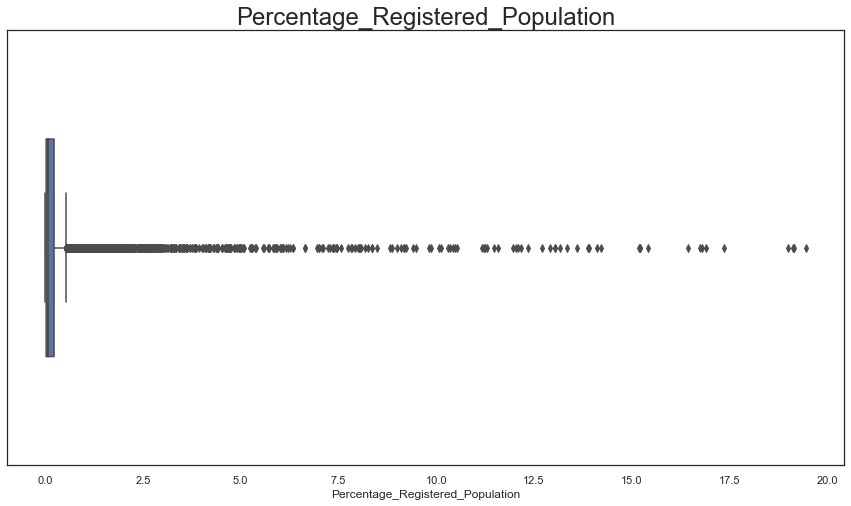

In [202]:

sns.set(style="white")
fig, ax = plt.subplots(figsize=(10,2))
sns.boxplot(zip_code_totals[zip_code_totals["Percentage_Registered_Population"]<20]["Percentage_Registered_Population"], width=.5, notch=True)
plt.gcf().set_size_inches(15, 8)
plt.title("Percentage_Registered_Population", size=24)

plt.show()

C:\Users\malac\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


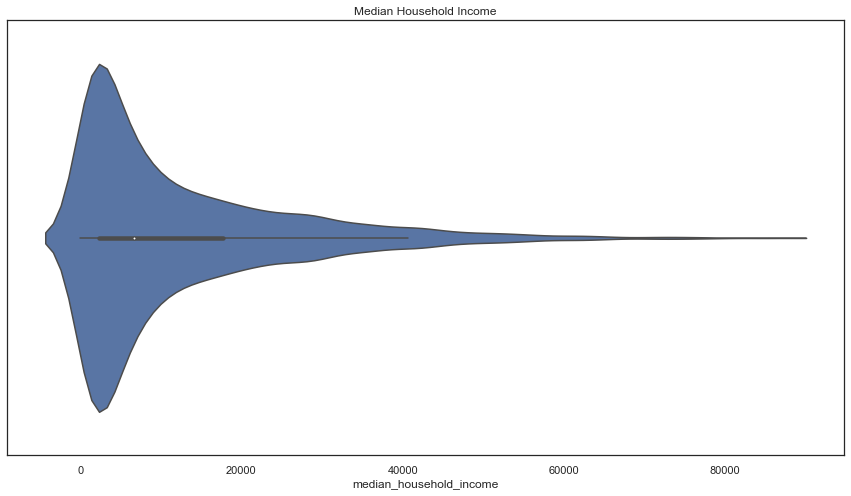

In [194]:
inc_violin_plot = sns.violinplot(zip_code_totals.median_household_income)
inc_violin_plot.set_title("Median Household Income")
plt.gcf().set_size_inches(15, 8)

C:\Users\malac\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


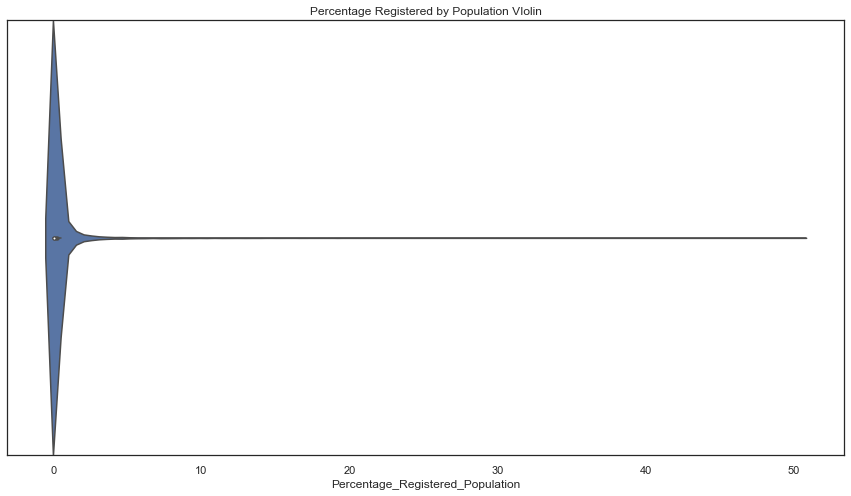

In [195]:
reg_violin_plot = sns.violinplot(zip_code_totals["Percentage_Registered_Population"], width=1, notch=True)
reg_violin_plot.set_title("Percentage Registered by Population VIolin")
plt.gcf().set_size_inches(15, 8)

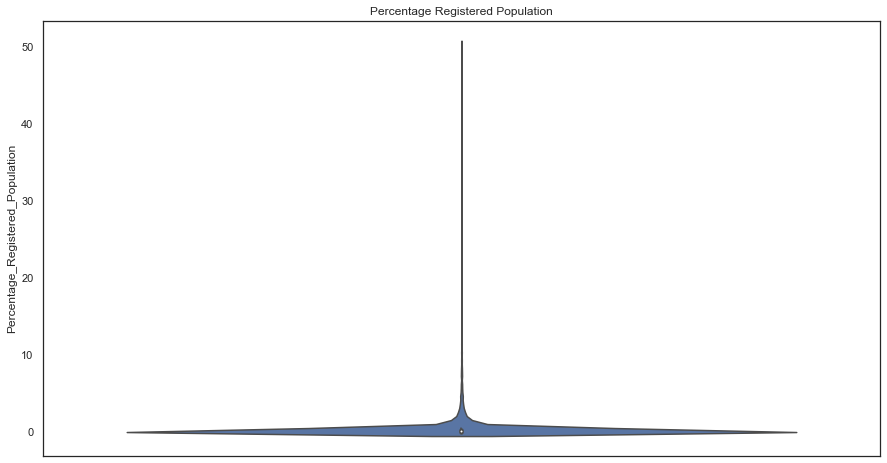

In [196]:
pct_violin_plot1 = sns.violinplot(y = zip_code_totals[zip_code_totals["Percentage_Registered_Population"]<200]["Percentage_Registered_Population"])
pct_violin_plot1.set_title("Percentage Registered Population")
plt.gcf().set_size_inches(15, 8)

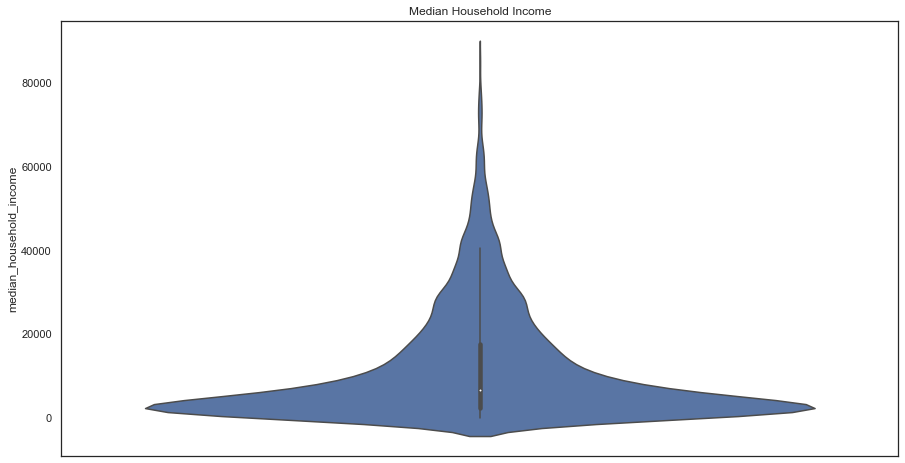

In [197]:
inc_violin_plot1 = sns.violinplot(y = zip_code_totals["median_household_income"])
inc_violin_plot1.set_title("Median Household Income")
plt.gcf().set_size_inches(15, 8)

In [200]:
X = sm.add_constant(zip_code_totals["median_household_income"])
Y = zip_code_totals.Percentage_Registered_Population

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

C:\Users\malac\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     Percentage_Registered_Population   R-squared:                       0.045
Model:                                          OLS   Adj. R-squared:                  0.045
Method:                               Least Squares   F-statistic:                     435.1
Date:                              Tue, 08 Feb 2022   Prob (F-statistic):           1.91e-94
Time:                                      21:03:01   Log-Likelihood:                -17498.
No. Observations:                              9171   AIC:                         3.500e+04
Df Residuals:                                  9169   BIC:                         3.501e+04
Df Model:                                         1                                         
Covariance Type:                          nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0880      0.023      3.843      0.000       0.043       0.133
median_household_income  2.624e-05   1.26e-06     20.859      0.000    2.38e-05    2.87e-05
==============================================================================
Omnibus:                    16644.719   Durbin-Watson:                   1.775
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         25383834.534
Skew:                          13.323   Prob(JB):                         0.00
Kurtosis:                     259.355   Cond. No.                     2.44e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

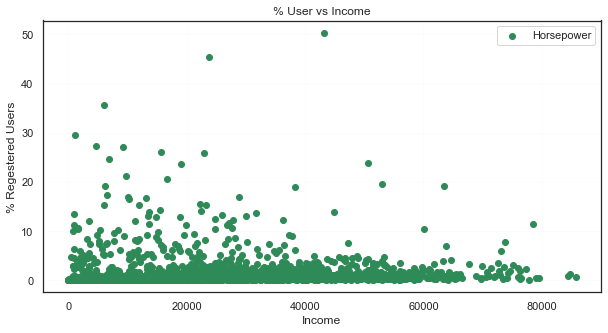

In [201]:
plt.figure(figsize=(10,5))
plt.scatter(zip_code_totals.median_household_income, zip_code_totals.Percentage_Registered_Population, color="seagreen", label="Horsepower")
plt.xlabel("Income")
plt.ylabel("% Regestered Users")
plt.title("% User vs Income")
plt.legend()

plt.grid(alpha=0.05)

plt.show()